In [41]:
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
import sys
sys.path.append('../src')
from data import fetch_model_data
from model import evaluation
%aimport data.fetch_model_data
%aimport model.evaluation

# Investigate Cohort

In [44]:
metrics=['roc_auc', 'accuracy', 'precision']

## Load Data

In [45]:
ip_address = '18.218.116.177'
raw = fetch_model_data.fetch_model_data(ip_address)

In [46]:
first_feature_set = [
    'author_ideology',
    'author_party',
    'author_is_chair',
    'author_years_sen',
    'author_total_funding',
    'total_sponsors',
    'sponsor_chairs',
    'agg_funding_sponsors',
    'agg_exp_sponsors',
    'total_slips',
    'slips_perc_pro',
    'bipartisan',
    'ideol_range',
    'first_word_approp',
]

In [47]:
X, y = raw[first_feature_set], raw.third_reading
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99, stratify=y)

In [62]:
y.value_counts()

1    721
0    132
Name: third_reading, dtype: int64

## Run Models

In [48]:
model = ('stupid_dt', {'max_depth': 5, 'min_samples_leaf': 13, 'min_impurity_decrease': 0.01}, DecisionTreeClassifier)

In [49]:
results = evaluation.cross_validate(
    estimator=model[2],
    X=X_train,
    y=y_train,
    fit_params=model[1],
    scoring=metrics
)

In [50]:
# Stupid model is very close to being the best

In [51]:
X_val = results['X_test']
y_true = results['y_true']
y_preds = results['y_preds']

In [52]:
X_val[0]

array([[-0.47 ,  1.   ,  1.   , ...,  1.   ,  1.738,  0.   ],
       [ 0.497,  2.   ,  0.   , ...,  1.   ,  1.362,  0.   ],
       [ 0.507,  2.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.431,  2.   ,  0.   , ...,  0.   ,  0.097,  0.   ],
       [-0.684,  1.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.622,  2.   ,  0.   , ...,  0.   ,  0.   ,  0.   ]])

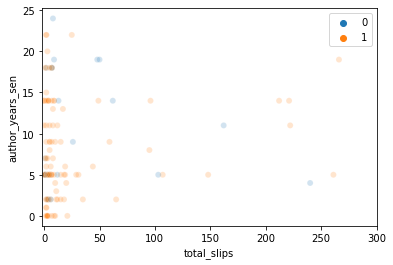

In [56]:
for i in range(0, 1):
    X = pd.DataFrame(X_val[0], columns=first_feature_set)
#     plt.scatter(X['total_slips'], X['author_years_sen'])
    g = sns.scatterplot(X['total_slips'], X['author_years_sen'], hue=y_true[0], alpha=0.2)
    g.set(xlim=(-2,300))


In [54]:
# Super strong overlap on no-slips and specific years of experience
# Wonder who those authors are

In [61]:
r = export_text(results['estimators'][0], feature_names=first_feature_set)
print(r)

|--- total_slips <= 83.50
|   |--- class: 1
|--- total_slips >  83.50
|   |--- class: 1



In [ ]:
1052
1055
1062
1082